In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [72]:
df_ant_cd = pd.read_csv('../nutrition_indicators/Malawi/mwi_anthropometry_codebook.csv')
df_ant = pd.read_csv('../nutrition_indicators/Malawi/mwi_anthropometry.csv')
df_nut_cd = pd.read_csv('../nutrition_indicators/Malawi/mwi_nutrition_codebook.csv')
df_nut = pd.read_csv('../nutrition_indicators/Malawi/mwi_nutrition.csv', dtype={'hhid':np.int64, 'def_kcal_ae_hh':np.int64})

In [73]:
df = df_nut.merge(df_ant, on = 'hhid')

In [74]:
def get_corr(df, col):
    df_corr = df[df[col].notnull()]
    df_corr = df_corr.corr()[[col]]
    df_corr = df_corr.applymap(lambda x: abs(x))
    df_corr = df_corr.sort(columns = col, ascending= False)
    return df_corr

In [75]:
df.corr()[['bmiz06','whz06','waz06', 'haz06']].to_csv('correlations.csv')

In [76]:
correl = df.corr()[['bmiz06','whz06','waz06', 'haz06']]

In [77]:
df_nut['micro_rec_count'] = (df_nut.def_iron_rec_hh + df_nut.def_zinc_rec_hh + df_nut.def_vita_A_rec_hh + 
                             df_nut.def_vita_E_rec_hh + df_nut.def_vita_C_rec_hh + df_nut.def_ribof_rec_hh + 
                             df_nut.def_thia_rec_hh + df_nut.def_nia_rec_hh + df_nut.def_vita_B6_rec_hh + 
                             df_nut.def_fol_rec_hh + df_nut.def_calcium_rec_hh + df_nut.def_vita_B12_rec_hh)

In [78]:
def make_indicator(val):
    yesno = {}
    yesno['Yes'] = 1
    yesno['No'] = 0
    
    return yesno[val]

In [79]:
df_nut.def_iron_rec_hh.map(make_indicator)

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
1112    0
1113    0
1114    0
1115    1
1116    0
1117    0
1118    0
1119    0
1120    0
1121    1
1122    1
1123    0
1124    0
1125    0
1126    0
1127    0
1128    0
1129    0
1130    0
1131    0
1132    0
1133    0
1134    0
1135    0
1136    0
1137    0
1138    0
1139    0
1140    0
1141    0
Name: def_iron_rec_hh, dtype: int64

In [80]:
rec_cols = ['def_iron_rec_hh', 'def_zinc_rec_hh', 'def_vita_A_rec_hh',
            'def_vita_E_rec_hh', 'def_vita_C_rec_hh', 'def_ribof_rec_hh', 
            'def_thia_rec_hh', 'def_nia_rec_hh', 'def_vita_B6_rec_hh', 
            'def_fol_rec_hh', 'def_calcium_rec_hh', 'def_vita_B12_rec_hh']
req_cols = ['def_iron_req_hh', 'def_zinc_req_hh', 'def_vita_A_req_hh',
           'def_vita_E_req_hh', 'def_vita_C_req_hh', 'def_ribof_req_hh', 
           'def_thia_req_hh', 'def_nia_req_hh', 'def_vita_B6_req_hh', 
           'def_fol_req_hh', 'def_calcium_req_hh', 'def_vita_B12_req_hh']

In [81]:
for i in rec_cols + req_cols:
    df_nut[i] = df_nut[i].map(make_indicator)

In [82]:
df_nut.def_nia_req_hh

0       0
1       0
2       0
3       1
4       0
5       0
6       0
7       0
8       0
9       0
10      1
11      1
12      0
13      0
14      0
15      0
16      1
17      0
18      0
19      0
20      1
21      0
22      1
23      0
24      0
25      0
26      0
27      0
28      1
29      0
       ..
1112    1
1113    1
1114    0
1115    1
1116    1
1117    0
1118    1
1119    1
1120    0
1121    1
1122    1
1123    1
1124    0
1125    1
1126    1
1127    1
1128    0
1129    1
1130    1
1131    0
1132    0
1133    0
1134    0
1135    0
1136    1
1137    0
1138    0
1139    0
1140    1
1141    0
Name: def_nia_req_hh, dtype: int64

In [83]:
df_nut['micro_rec_count'] = (df_nut.def_iron_rec_hh + df_nut.def_zinc_rec_hh + df_nut.def_vita_A_rec_hh + 
                             df_nut.def_vita_E_rec_hh + df_nut.def_vita_C_rec_hh + df_nut.def_ribof_rec_hh + 
                             df_nut.def_thia_rec_hh + df_nut.def_nia_rec_hh + df_nut.def_vita_B6_rec_hh + 
                             df_nut.def_fol_rec_hh + df_nut.def_calcium_rec_hh + df_nut.def_vita_B12_rec_hh)

In [84]:
df_nut['micro_rec_count_pct'] = df_nut['micro_rec_count'] / 12.0

In [85]:
df_nut['micro_rec_count_pct']

0       0.000000
1       0.250000
2       0.000000
3       0.416667
4       0.333333
5       0.000000
6       0.083333
7       0.000000
8       0.083333
9       0.000000
10      0.416667
11      0.583333
12      0.250000
13      0.333333
14      0.166667
15      0.000000
16      0.583333
17      0.000000
18      0.000000
19      0.000000
20      0.333333
21      0.250000
22      0.250000
23      0.083333
24      0.000000
25      0.083333
26      0.000000
27      0.250000
28      0.583333
29      0.083333
          ...   
1112    0.416667
1113    0.250000
1114    0.083333
1115    0.833333
1116    0.750000
1117    0.000000
1118    0.250000
1119    0.833333
1120    0.000000
1121    0.833333
1122    0.833333
1123    0.750000
1124    0.000000
1125    0.583333
1126    0.416667
1127    0.583333
1128    0.166667
1129    0.250000
1130    0.583333
1131    0.333333
1132    0.083333
1133    0.000000
1134    0.083333
1135    0.083333
1136    0.416667
1137    0.083333
1138    0.083333
1139    0.0833

In [86]:
df_nut['micro_req_count'] = (df_nut.def_iron_req_hh + df_nut.def_zinc_req_hh + df_nut.def_vita_A_req_hh + 
                             df_nut.def_vita_E_req_hh + df_nut.def_vita_C_req_hh + df_nut.def_ribof_req_hh + 
                             df_nut.def_thia_req_hh + df_nut.def_nia_req_hh + df_nut.def_vita_B6_req_hh + 
                             df_nut.def_fol_req_hh + df_nut.def_calcium_req_hh + df_nut.def_vita_B12_req_hh)

In [87]:
df_nut['micro_req_count_pct'] = df_nut.micro_req_count / 12.0

In [88]:
df_aq_cals = df_nut[['hhid', 'def_kcal_ae_hh', 'micro_req_count', 'micro_rec_count', 'micro_req_count_pct', 
                     'micro_rec_count_pct']]


In [89]:
df_aq_cals.to_csv('micro_count.csv', index=False)

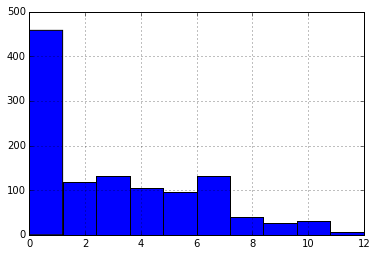

In [22]:
df_aq_cals.micro_rec_count.hist()

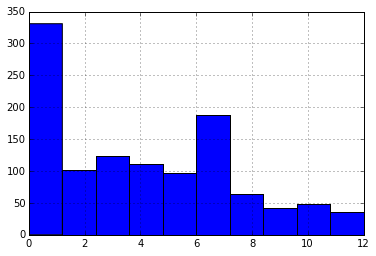

In [23]:
df_aq_cals.micro_req_count.hist()